<a href="https://colab.research.google.com/github/zardemostoles/zardemostoles-uoc.edu/blob/master/TFG_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cat /content/drive/MyDrive/TFG/train.csv | head

image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
ISIC_0000000,-1,female,55.0,anterior torso,NV,benign,0,4,1022,767
ISIC_0000001,-1,female,30.0,anterior torso,NV,benign,0,18,1022,767
ISIC_0000002,-1,female,60.0,upper extremity,MEL,malignant,1,0,1022,767
ISIC_0000003,-1,male,30.0,upper extremity,NV,benign,0,24,1022,767
ISIC_0000004,-1,male,80.0,posterior torso,MEL,malignant,1,14,1022,767
ISIC_0000006,-1,female,25.0,posterior torso,NV,benign,0,0,1022,767
ISIC_0000007,-1,female,25.0,posterior torso,NV,benign,0,16,1022,767
ISIC_0000008,-1,female,30.0,anterior torso,NV,benign,0,18,1022,767
ISIC_0000009,-1,female,30.0,anterior torso,NV,benign,0,8,1022,767


In [ ]:
# Se cargan las bibliotecas que se van a usar en el ejercicio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.gridspec import GridSpec

In [ ]:
# Se crea el dataframe pandas y se muestran las 5 primeras filas               
df_ISIC = pd.read_csv('/content/drive/MyDrive/TFG/train.csv')
df_ISIC.head(30)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
0,ISIC_0000000,-1,female,55.0,anterior torso,NV,benign,0,4,1022,767
1,ISIC_0000001,-1,female,30.0,anterior torso,NV,benign,0,18,1022,767
2,ISIC_0000002,-1,female,60.0,upper extremity,MEL,malignant,1,0,1022,767
3,ISIC_0000003,-1,male,30.0,upper extremity,NV,benign,0,24,1022,767
4,ISIC_0000004,-1,male,80.0,posterior torso,MEL,malignant,1,14,1022,767
5,ISIC_0000006,-1,female,25.0,posterior torso,NV,benign,0,0,1022,767
6,ISIC_0000007,-1,female,25.0,posterior torso,NV,benign,0,16,1022,767
7,ISIC_0000008,-1,female,30.0,anterior torso,NV,benign,0,18,1022,767
8,ISIC_0000009,-1,female,30.0,anterior torso,NV,benign,0,8,1022,767
9,ISIC_0000010,-1,female,35.0,posterior torso,NV,benign,0,16,1022,767


In [ ]:
# Se comprueba que no hay información de ID de paciente
df_ISIC["patient_id"].unique()

array([-1])

In [ ]:
df_ISIC.shape

(25331, 11)

In [ ]:
# Se elimina la columna de ID de paciente
# y otras columnas no necesarias
df_ISIC = df_ISIC.drop(columns=["patient_id", "tfrecord", "width", "height"], axis=1)

In [ ]:
# Se cuentan cuantas imágenes son "downsampled"
df_ISIC[df_ISIC['image_name'].str.contains("_downsampled")]['image_name'].count()

2074

In [ ]:
# Se eliminan los registros con imágenes "downsampled"
df_ISIC = df_ISIC[df_ISIC['image_name'].str.contains("_downsampled")==False]

In [ ]:
df_ISIC.shape

(23257, 7)

In [ ]:
df_ISIC['target'] = df_ISIC['target'].replace({0: "no melanoma", 1: "melanoma"})

In [ ]:
df_ISIC["target"].value_counts(normalize=True)

0    0.821645
1    0.178355
Name: target, dtype: float64

In [ ]:
round(pd.crosstab(df_ISIC["anatom_site_general_challenge"],df_ISIC["target"], normalize='index')*100, 1)

target,0,1
anatom_site_general_challenge,,
anterior torso,80.8,19.2
head/neck,81.3,18.7
lateral torso,50.0,50.0
lower extremity,84.4,15.6
oral/genital,67.8,32.2
palms/soles,49.4,50.6
posterior torso,85.0,15.0
upper extremity,75.9,24.1


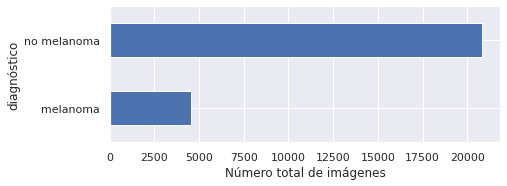

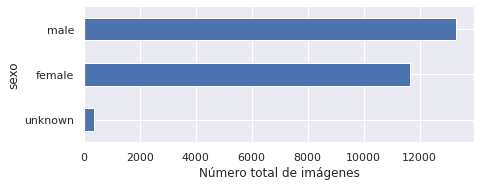

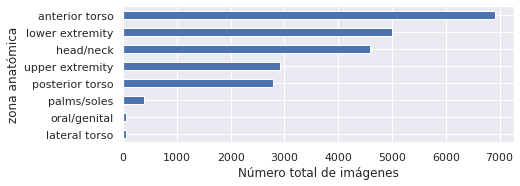

In [ ]:
distribuciones = {
    "target": "diagnóstico",
    "sex": "sexo",
    "anatom_site_general_challenge": "zona anatómica"
}

for key, value in distribuciones.items():
  ax = df_ISIC[key].value_counts().plot(kind='barh',
                                    figsize=(7,2.5),
                                    title=None);
  ax.set_ylabel(value);
  ax.set_xlabel("Número total de imágenes");
  ax.invert_yaxis();
  plt.show();

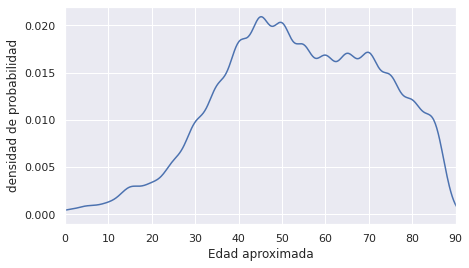

In [ ]:
ax = df_ISIC["age_approx"].plot(kind='density', 
                           xlim=[0,90],
                           figsize=(7,4));
ax.set_xlabel("Edad aproximada");
ax.set_ylabel("densidad de probabilidad");
plt.show();


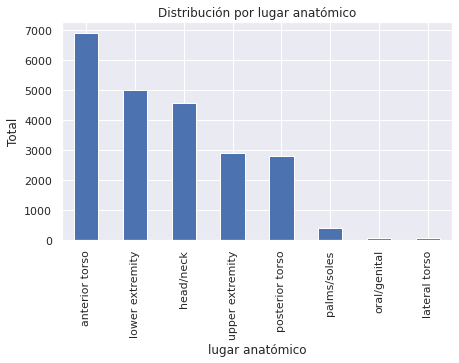

In [ ]:
ax = df_ISIC['anatom_site_general_challenge'].value_counts().plot(kind='bar',
                                    figsize=(7,4),
                                    title="Distribución por lugar anatómico");
ax.set_xlabel("lugar anatómico");
ax.set_ylabel("Total");

In [ ]:
print("\nEstadísticos básicos de las variables del dataset:")
round(df_ISIC.describe(include='all'),3)


Estadísticos básicos de las variables del dataset:


,image_name,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
count,25331,25331,24894.000,22700,25331,25331,25331.000
unique,25331,3,NaN,8,8,2,NaN
top,ISIC_0000000,male,NaN,anterior torso,NV,benign,NaN
freq,1,13286,NaN,6915,12875,20809,NaN
mean,NaN,NaN,54.028,NaN,NaN,NaN,0.179
std,NaN,NaN,18.131,NaN,NaN,NaN,0.383
min,NaN,NaN,0.000,NaN,NaN,NaN,0.000
25%,NaN,NaN,40.000,NaN,NaN,NaN,0.000
50%,NaN,NaN,55.000,NaN,NaN,NaN,0.000
75%,NaN,NaN,70.000,NaN,NaN,NaN,0.000


In [ ]:
round(pd.crosstab(index=df_ISIC['sex'], columns=df_ISIC['target'], normalize='index')*100,2)


target,melanoma,no melanoma
sex,,
female,16.98,83.02
male,18.52,81.48
unknown,21.09,78.91


In [ ]:
round(pd.crosstab(index=df_ISIC['anatom_site_general_challenge'], columns=df_ISIC['target'], normalize='index')*100,2)

target,melanoma,no melanoma
anatom_site_general_challenge,,
anterior torso,19.25,80.75
head/neck,19.18,80.82
lateral torso,25.93,74.07
lower extremity,15.95,84.05
oral/genital,32.20,67.80
palms/soles,50.50,49.50
posterior torso,15.43,84.57
upper extremity,24.88,75.12


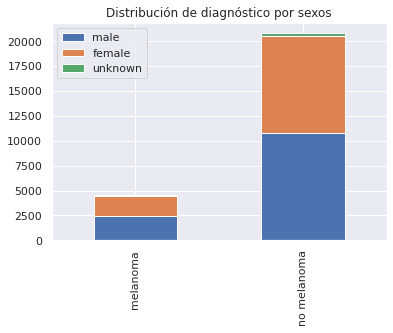

In [ ]:
# Stacked barplot with pandas
melanona = df_ISIC.loc[df_ISIC['target']==1, :]['sex'].value_counts()
no_melanoma = df_ISIC.loc[df_ISIC['target']==0, :]['sex'].value_counts()
df_plot  = pd.DataFrame([melanona,no_melanoma])
df_plot.index=['melanoma','no melanoma']

# Plot
df_plot.plot(kind='bar',stacked=True, title='Distribución de diagnóstico por sexos');

In [ ]:
melanona

male       2461
female     1980
unknown      81
Name: sex, dtype: int64

In [ ]:
import scipy.stats as stats
df_ISIC2 = df_ISIC[df_ISIC["sex"]!="unknown"]
crosstab = pd.crosstab(df_ISIC["sex"], df_ISIC["target"])
# are these variables independent?
chi2, p, dof, ex = stats.chi2_contingency(crosstab)

print(f'Chi_square value {chi2}\n\np value {p}\n\ndegrees of freedom {dof}\n\n expected {ex}')



Chi_square value 12.884809833431529

p value 0.0015925720683106599

degrees of freedom 2

 expected [[ 2081.68023371  9579.31976629]
 [ 2371.76945245 10914.23054755]
 [   68.55031384   315.44968616]]


In [ ]:
from scipy.stats import pearsonr
pearsonr(df_ISIC)

target,melanoma,no melanoma
sex,,
female,1980,9681
male,2461,10825
unknown,81,303
